Computer Vision Assignment

Objective 1: Count the number of rice grains in the Image.

Objective 2: Find the number of broken grains in the image.

You can assume the following in the image:

● The background will always be blue.
● There will be a mix of broken and non-broken rice grains.
● The grains will not overlap but can touch each other.

In [1]:
import cv2
import cv2 as cv
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [2]:
def show(image, x=30, y=7):
  img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)

**Image Pre-processing**

we have to do pre processing first, once the image gets fine tuned then it becomes easy for further process.

In [3]:
img= plt.imread("/content/image_1.jpg")
print(img.shape)

(2250, 4000, 3)


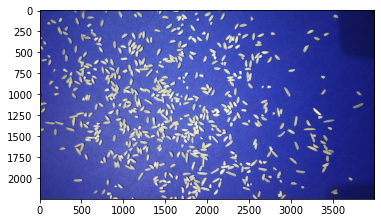

In [4]:
plt.imshow(img)

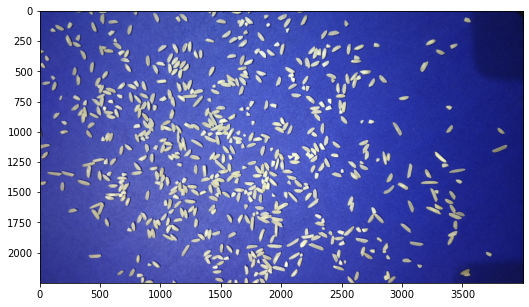

In [5]:
plt.figure(figsize=(25,5))
plt.imshow(img)

Converting image into Grayscale and then Image Thresholding

In [6]:
#img=cv2.imread('image_1.jpg')
#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

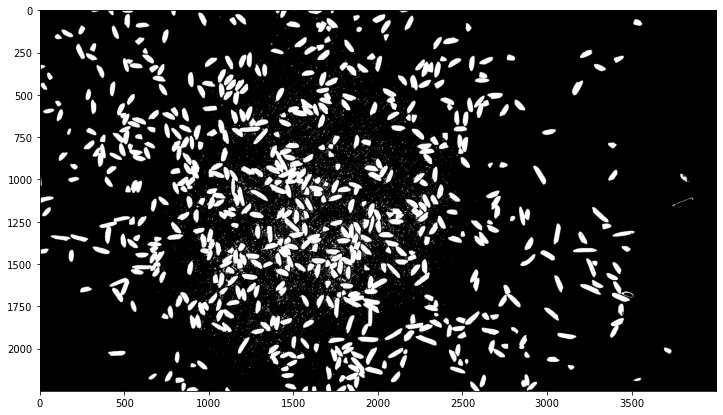

In [35]:
gray_image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh_img= cv2.threshold(gray_image,140,255,cv2.THRESH_BINARY)
show(thresh_img)

**NOISE REMOVAL**

Morphological method is used to reomve the noise(white dot) in the image.


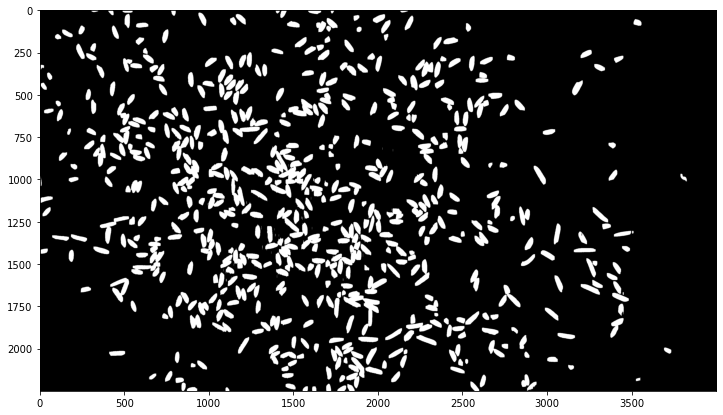

In [22]:
kernel=np.ones((3),np.uint8)
clear_img= cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN,kernel,iterations=6)
show(clear_img)

Image pre-Processing is done, then need to count the grains.

**COUNTING THE LABELS**

copying the pre-processing image as label image.

Getting the shape(height and width)of the image.

Using Looping fuction to get the pixel of rows and cols.

0 represents for black and
255 represents for white

Applying floodFill method in the image to get the counting of grains

In [36]:
label_image = clear_img.copy()
label_count = 0

rows,cols = label_image.shape

for j in range(rows):
  for i in range(cols):
    pixel = label_image[j, i]

    if 255 == pixel:
      label_count += 1

cv.floodFill(label_image, None, (i,j), label_count)

             


(7906228, array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), (0, 0, 4000, 2250))

In [37]:
print("Number of objects =", label_count)

Number of objects = 1092700


# **OBJECTIVE 1**

# **COUNTING THE TOTAL NUMBER OF GRAINS**



**COUNTING THE GRAINS BY USING CONTOUR METHOD**

In [39]:
contours, hierarchy = cv.findContours(clear_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

Number of contours 527


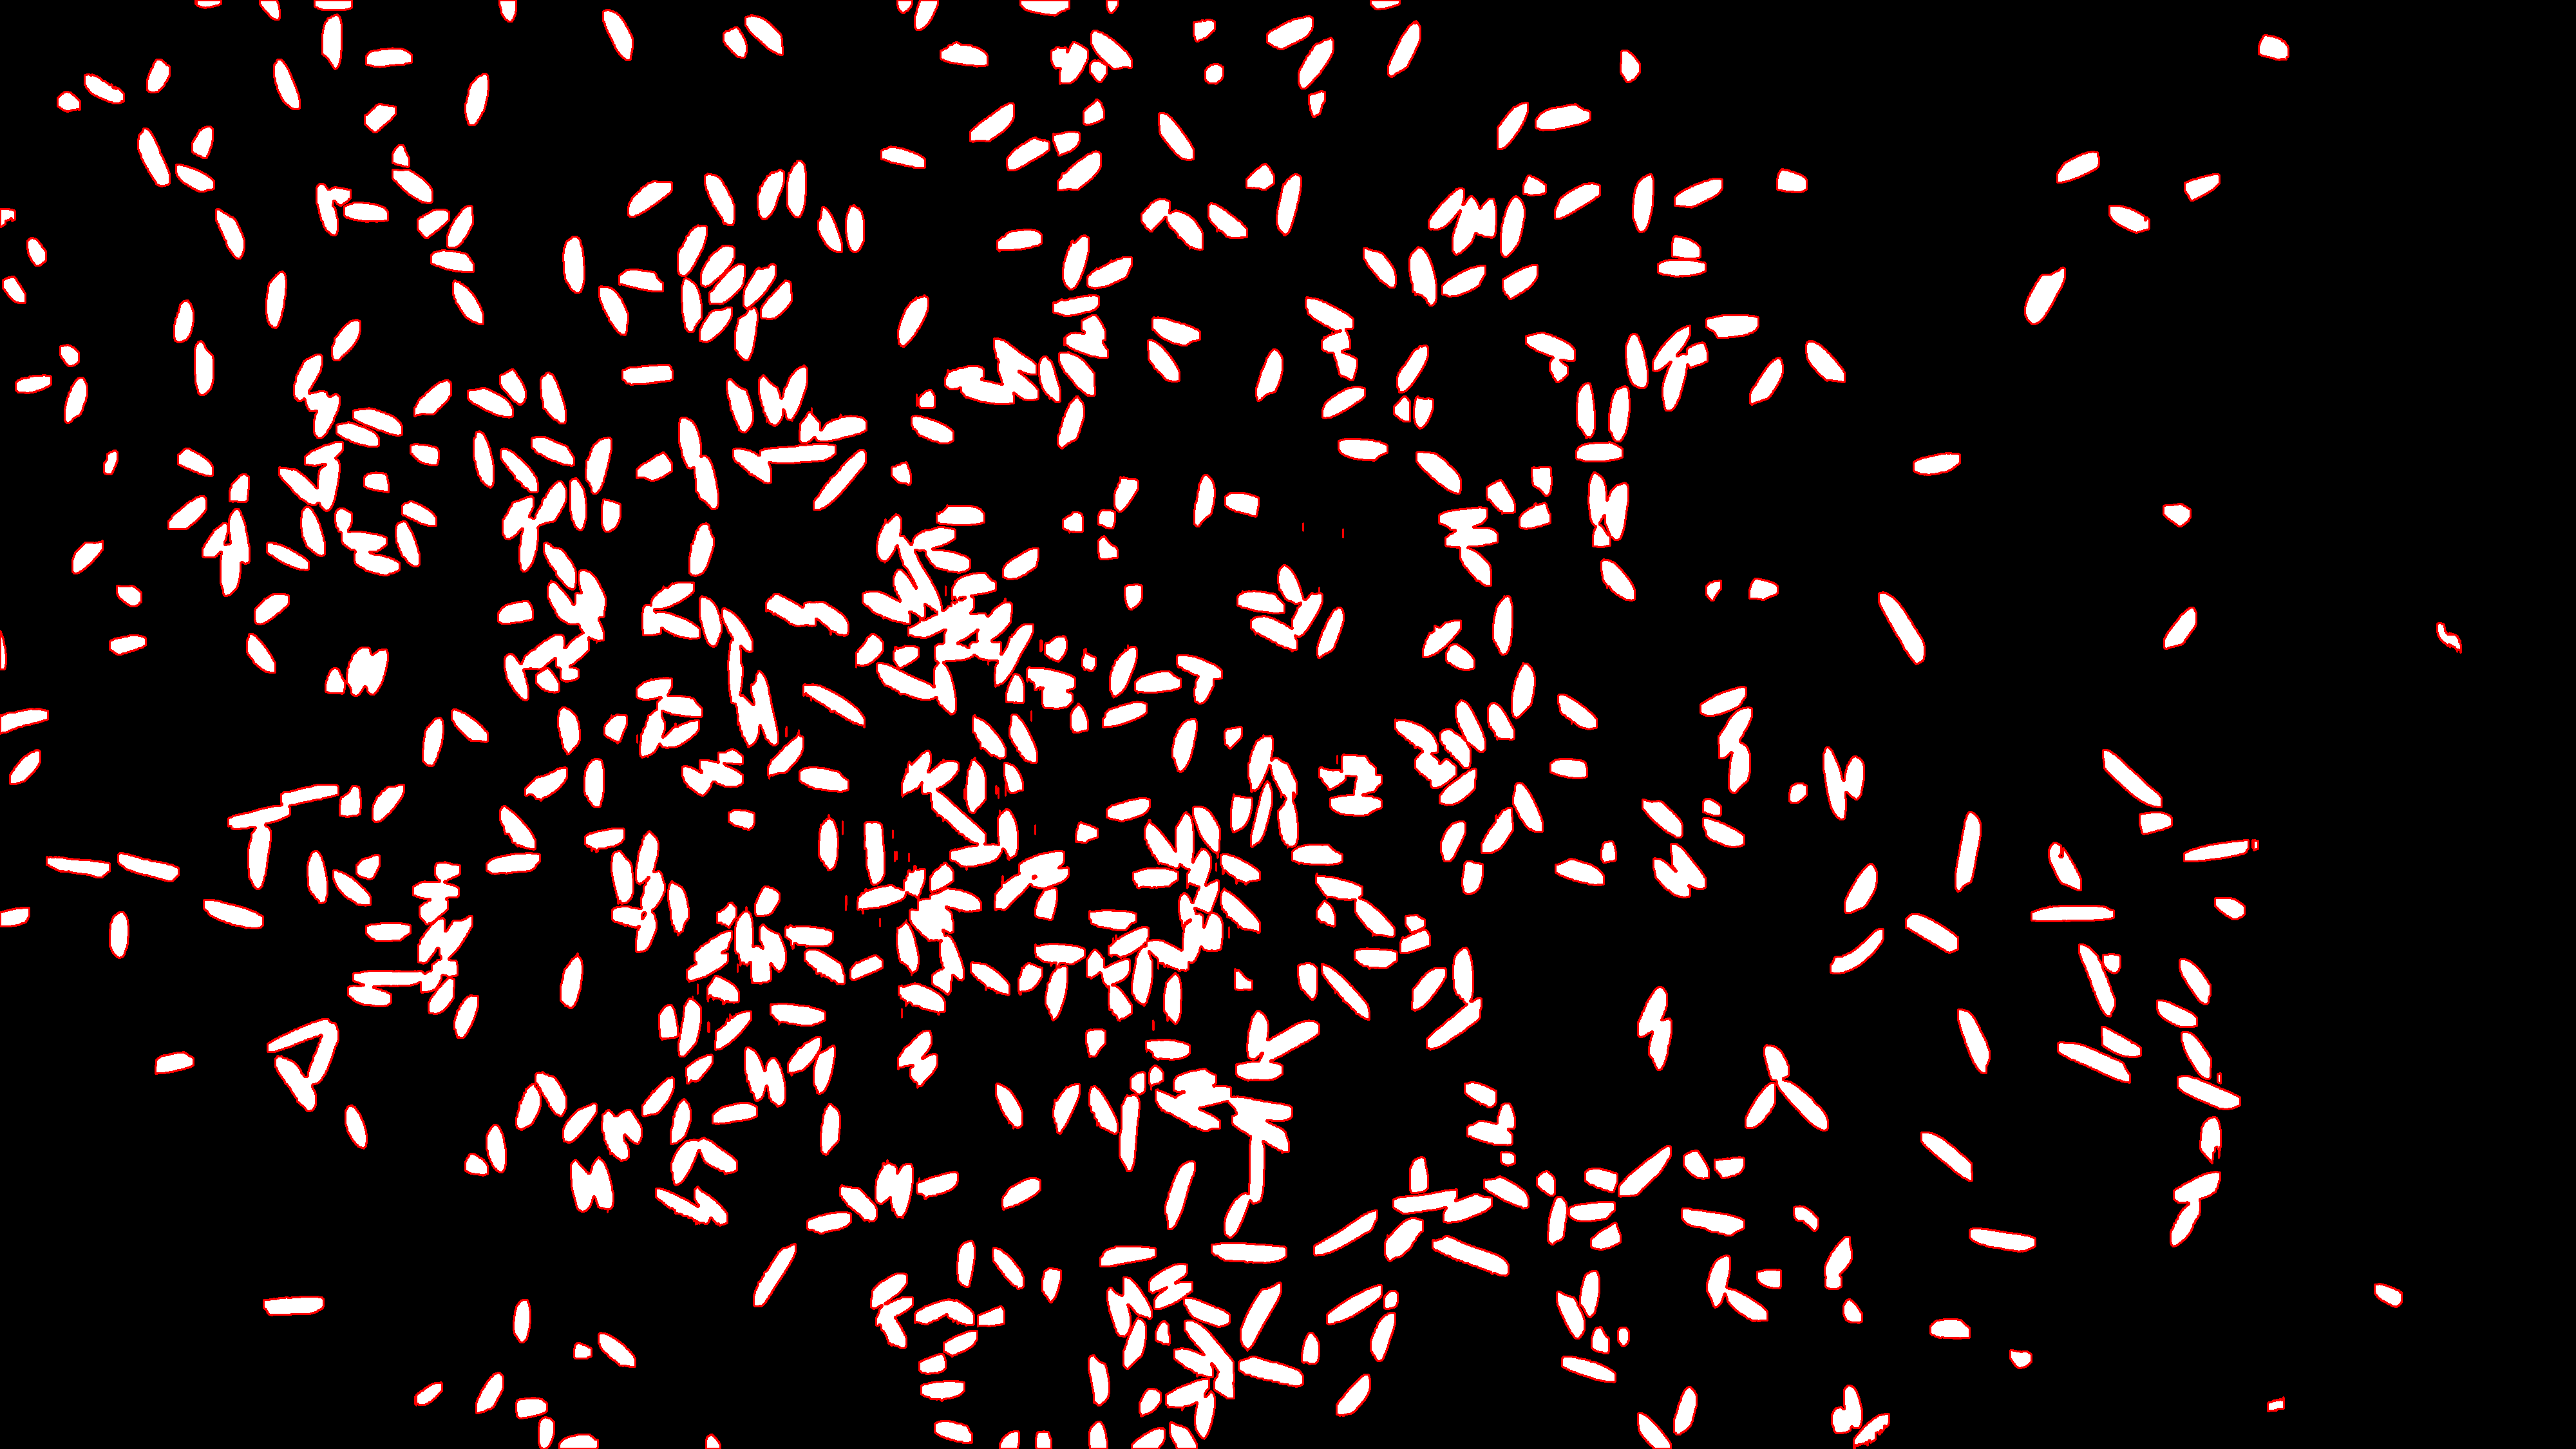

In [45]:
output_contour= cv.cvtColor(clear_img, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1,(0,0,255),2)
print("Number of contours", len(contours))
cv2_imshow(output_contour)

There are totally **527** **grains** are presented in this image

Applying **WATERSHED ALGORITHM** to detect the touching of grains

In [51]:
from scipy import ndimage
from skimage import filters,feature,measure,color
from skimage.segmentation import watershed

We need to color code the grains to identify the touching, broken and full grains.

Applying peak_local_max function for getting the coordinates of local peak(maxima)



In [52]:
dist_trans= ndimage.distance_transform_edt(clear_img)
local_max = feature.peak_local_max(dist_trans, min_distance=25)


In [53]:
local_max_mask= np.zeros(dist_trans.shape, dtype=bool)
local_max_mask[tuple(local_max.T)]=True

Applying WATERSHED ALGORITHMM to find the touching grains

In [54]:
labels = watershed(-dist_trans, measure.label(local_max_mask), mask= clear_img)

Number of Rice Grains are: 577


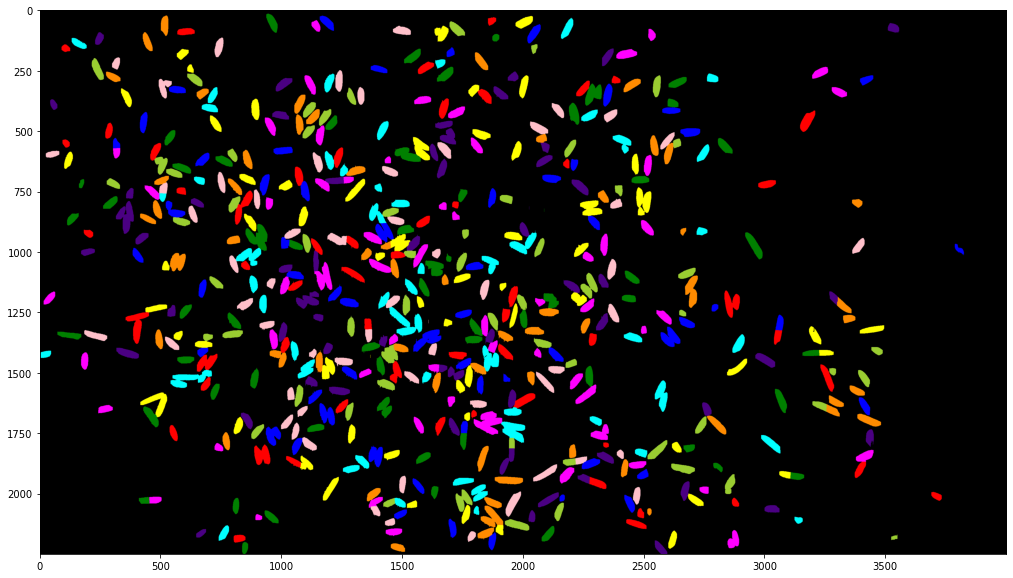

In [60]:
plt.figure(figsize=(50,10))
plt.imshow(color.label2rgb (labels, bg_label=0))
print("Number of Rice Grains are: %d" % labels.max())

Now the image is well fine tuned, we can able to see the diferent shapes of grains and touching grains are well separated and clear. So that the counting of grains are noted.


Totally 577 grains are in the imges and 50grains are touching each other.

# **OBEJECTIVE 2**

# **COUNTING THE BROKEN GRAINS**

800 is the threshold limit of broken garins from the full grains.



In [62]:
count=[]

for x in contours:
   area = cv.contourArea(x)
   if area < 800:
     count.append(x)


In [63]:
print("Number of Broken Grains are:", len(count))

Number of Broken Grains are: 99


There are **99 broken grains** are present in this image.

# **APPROACHES**

Here I use WATERSHED ALGORITHM to count and splliting the grains.

We can also try with NEURAL NETWROK TRAINING.Training a neural network on a custom dataset having well annotated full rice grain and broken rice grains images.

It will give the optimal solution with very less error. I haven’t applied this as I haven’t found any pre-trained model or dataset for the following. But this method can be taken further to take into consideration.